In [6]:
#Implement convolution operation for a sample image of shape (H=6, W=6, C=1) with a random kernel of size (3,3) using torch.nn.functional.conv2d
import torch
import torch.nn.functional as functional

image = torch.rand(1, 1, 6, 6)
print("The shape of the image is " + str(image.size()))
print("The randomized image matrix is")
print(image)
kernel = torch.rand(1, 1, 3, 3)
print("The image will be convolved with the kernel:")
print(kernel)
print("The shape of the kernel is " + str(kernel.size()))
out_image = functional.conv2d(image, kernel, padding = 0)
print("The convolved output image is:")
print(out_image) 
print("The shape of the output image is " + str(out_image.size()))

The shape of the image is torch.Size([1, 1, 6, 6])
The randomized image matrix is
tensor([[[[0.7855, 0.9438, 0.5440, 0.5327, 0.2183, 0.5356],
          [0.0362, 0.8899, 0.9737, 0.0755, 0.7676, 0.1353],
          [0.7232, 0.9310, 0.8266, 0.3051, 0.3841, 0.8537],
          [0.9013, 0.9915, 0.1174, 0.8064, 0.3471, 0.0399],
          [0.0177, 0.0757, 0.7312, 0.7147, 0.8471, 0.9472],
          [0.5494, 0.5338, 0.6550, 0.8870, 0.7871, 0.0607]]]])
The image will be convolved with the kernel:
tensor([[[[0.1498, 0.6362, 0.6469],
          [0.9085, 0.4362, 0.0973],
          [0.0623, 0.6783, 0.7193]]]])
The shape of the kernel is torch.Size([1, 1, 3, 3])
The convolved output image is:
tensor([[[[2.8571, 2.9108, 2.0886, 1.8754],
          [3.1582, 2.7591, 2.4159, 1.4294],
          [3.0766, 2.9080, 2.1982, 3.0307],
          [1.8295, 2.3177, 3.0223, 2.1111]]]])
The shape of the output image is torch.Size([1, 1, 4, 4])


In [7]:
"""What is the dimension of the output image? Apply, various values for parameter stride=1and note the change in the dimension of the output image. Arrive at an equation for the
output image size with respect to the kernel size and stride and verify your answer with code. Now, repeat the exercise by changing padding parameter. Obtain a formula using
kernel, stride, and padding to get the output image size. What is the total number of parameters in your network? Verify with code. (done in notebook)"""

'What is the dimension of the output image? Apply, various values for parameter stride=1and note the change in the dimension of the output image. Arrive at an equation for the\noutput image size with respect to the kernel size and stride and verify your answer with code. Now, repeat the exercise by changing padding parameter. Obtain a formula using\nkernel, stride, and padding to get the output image size. What is the total number of parameters in your network? Verify with code. (done in notebook)'

In [8]:
#Apply torch.nn.Conv2d to the input image of Qn 1 with out-channel=3 and observe theoutput. Implement the equivalent of torch.nn.Conv2d using the torch.nn.functional.conv2D to get the same output. You may ignore bias.
import torch
import torch. nn as nn

image = torch.rand(1, 1, 6, 6)
process = nn.Conv2d(in_channels = 1, out_channels = 3, kernel_size = 3, stride = (1, 1), padding = (0, 0))
out_image = process(image)
print(out_image)
print("The shape of the output image is" + str(out_image.size()))


tensor([[[[-0.0584, -0.0136, -0.3412, -0.4254],
          [-0.1496, -0.3625, -0.1028, -0.3297],
          [-0.5505, -0.3504, -0.0994, -0.2197],
          [-0.2802, -0.2491, -0.3506, -0.0632]],

         [[ 0.1109,  0.0558,  0.4281, -0.1193],
          [ 0.0260, -0.0473,  0.0368, -0.1541],
          [-0.0523, -0.1069,  0.1559,  0.0132],
          [-0.0578, -0.1408, -0.1626, -0.0869]],

         [[ 0.2967,  0.3383,  0.4576, -0.0149],
          [ 0.4169,  0.1456,  0.1795,  0.3215],
          [ 0.0360,  0.3532,  0.3030,  0.5339],
          [-0.2160,  0.2872,  0.0644,  0.1686]]]],
       grad_fn=<ConvolutionBackward0>)
The shape of the output image istorch.Size([1, 3, 4, 4])


In [18]:
"""Implement CNN for classifying digits in MNIST dataset using PyTorch. Display the
classification accuracy in the form of a Confusion matrix. Verify the number of learnable
parameters in the model.
Training a CNN on an image dataset is similar to training a basic multi-layer feed-forward
network on numerical data as outlined below.
Define model architecture
Load dataset from disk
Loop over epochs and batches
Make predictions and compute loss
Properly zero our gradient, perform backpropagation, and update model parameters"""
import torch.nn as nn
from keras.datasets import mnist
from torch import optim
from torch.utils.data import Dataset, DataLoader


class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(nn.Conv2d(1, 64, kernel_size = 4), 
        nn.ReLU(), 
        nn.MaxPool2d((2, 2), stride = 2), 
        nn.Conv2d(64, 128, kernel_size = 3), 
        nn.ReLU(), 
        nn.MaxPool2d((2, 2), stride = 2), 
        nn.Conv2d(128, 64, kernel_size = 3), 
        nn.ReLU(), 
        nn.MaxPool2d((2, 2), stride = 2))
        self.classification_head = nn.Sequential(nn.Linear(64, 20, bias = True),
        nn.ReLU(), 
        nn.Linear(20, 10, bias = True))

    def forward(self, x):
        features = self.net(x)
        return self.classification_head(features.view(batch_size, -1))
        
class customdataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
        self.y = self.y.type(torch.LongTensor)

    def size(self):
        return len(self.x)

    def get_item(self, index):
        return [self.x[index], self.y[index]]

(train_x, train_y), (test_x, test_y) = mnist.load_data()
data = customdataset(train_x, train_y)
batch_size = 100
train_data_loader = DataLoader(list(zip(data.x, data.y)), batch_size, shuffle = True)
m1 = CNN().to('cuda')
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(m1.parameters(), lr=0.01)
losses = []
m1.train(True)


for epoch in range(10):
    loss_t = 0
    for i, data in enumerate(train_data_loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        inputs = torch.unsqueeze(inputs, 1)
        optimizer.zero_grad()
        outputs = m1.forward(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        loss_t += loss.item()
#         if i%50 == 0:
#             print("Data entry:", i)
    loss_t = loss_t/(len(train_data_loader)*batch_size)
    losses.append(loss_t)
    if epoch%2 == 0:
        print("Epoch number " + str(epoch) + " Loss is " + str(loss_t))


Epoch number 0 Loss is 0.008381564380011211
Epoch number 2 Loss is 0.0006581380696423973
Epoch number 4 Loss is 0.00041617583584738893
Epoch number 6 Loss is 0.0002953471036821914
Epoch number 8 Loss is 0.0002218066582621153


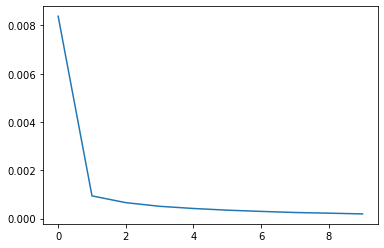

In [19]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(0, len(losses))], losses)

In [20]:
print(losses[-1])

0.00019112597438215745


In [15]:
torch.save(m1,"m_modified.pt")

In [16]:
#Modify CNN of Qn. 3 to reduce the number of parameters in the network. Draw a plot of percentage drop in parameters vs accuracy.
#modification 1
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(nn.Conv2d(1, 32, kernel_size = 4), 
        nn.ReLU(), 
        nn.MaxPool2d((2, 2), stride = 2), 
        nn.Conv2d(32, 64, kernel_size = 3), 
        nn.ReLU(), 
        nn.MaxPool2d((2, 2), stride = 2), 
        nn.Conv2d(64, 32, kernel_size = 3), 
        nn.ReLU(), 
        nn.MaxPool2d((2, 2), stride = 2))
        self.classification_head = nn.Sequential(nn.Linear(32, 16, bias = True),
        nn.ReLU(), 
        nn.Linear(16, 10, bias = True))

    def forward(self, x):
        features = self.net(x)
        return self.classification_head(features.view(batch_size, -1))
        
class customdataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
        self.y = self.y.type(torch.LongTensor)

    def size(self):
        return len(self.x)

    def get_item(self, index):
        return [self.x[index], self.y[index]]

(train_x, train_y), (test_x, test_y) = mnist.load_data()
data = customdataset(train_x, train_y)
batch_size = 100
train_data_loader = DataLoader(list(zip(data.x, data.y)), batch_size, shuffle = True)
m1 = CNN().to('cuda')
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(m1.parameters(), lr=0.01)
losses = []
m1.train(True)


for epoch in range(10):
    loss_t = 0
    for i, data in enumerate(train_data_loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        inputs = torch.unsqueeze(inputs, 1)
        optimizer.zero_grad()
        outputs = m1.forward(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        loss_t += loss.item()
#         if i%50 == 0:
#             print("Data entry:", i)
    loss_t = loss_t/(len(train_data_loader)*batch_size)
    losses.append(loss_t)
    if epoch%2 == 0:
        print("Epoch number " + str(epoch) + " Loss is " + str(loss_t))


Epoch number 0 Loss is 0.0052972200914596515
Epoch number 2 Loss is 0.0008016504513022179
Epoch number 4 Loss is 0.0005052817618629585
Epoch number 6 Loss is 0.0003673964352851423
Epoch number 8 Loss is 0.0002639624031765076


In [21]:
#modification 2
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(nn.Conv2d(1, 8, kernel_size = 4), 
        nn.ReLU(), 
        nn.MaxPool2d((2, 2), stride = 2), 
        nn.Conv2d(8, 16, kernel_size = 3), 
        nn.ReLU(), 
        nn.MaxPool2d((2, 2), stride = 2), 
        nn.Conv2d(16, 8, kernel_size = 3), 
        nn.ReLU(), 
        nn.MaxPool2d((2, 2), stride = 2))
        self.classification_head = nn.Sequential(nn.Linear(8, 12, bias = True),
        nn.ReLU(), 
        nn.Linear(12, 10, bias = True))

    def forward(self, x):
        features = self.net(x)
        return self.classification_head(features.view(batch_size, -1))
        
class customdataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.tensor(x, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
        self.y = self.y.type(torch.LongTensor)

    def size(self):
        return len(self.x)

    def get_item(self, index):
        return [self.x[index], self.y[index]]

(train_x, train_y), (test_x, test_y) = mnist.load_data()
data = customdataset(train_x, train_y)
batch_size = 100
train_data_loader = DataLoader(list(zip(data.x, data.y)), batch_size, shuffle = True)
m1 = CNN().to('cuda')
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(m1.parameters(), lr=0.01)
losses = []
m1.train(True)


for epoch in range(10):
    loss_t = 0
    for i, data in enumerate(train_data_loader):
        inputs, labels = data
        inputs = inputs.to('cuda')
        labels = labels.to('cuda')
        inputs = torch.unsqueeze(inputs, 1)
        optimizer.zero_grad()
        outputs = m1.forward(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        loss_t += loss.item()
#         if i%50 == 0:
#             print("Data entry:", i)
    loss_t = loss_t/(len(train_data_loader)*batch_size)
    losses.append(loss_t)
    if epoch%2 == 0:
        print("Epoch number " + str(epoch) + " Loss is " + str(loss_t))


Epoch number 0 Loss is 0.013835897170503934
Epoch number 2 Loss is 0.0031826578664282956
Epoch number 4 Loss is 0.0019172067871317268
Epoch number 6 Loss is 0.0015659983543679118
Epoch number 8 Loss is 0.0013771434812496106


In [22]:
print(losses[-1])

0.0013026189769618213


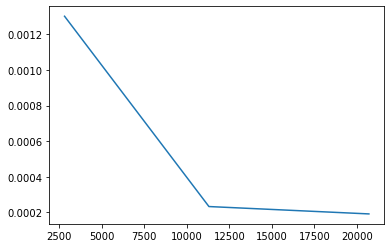

In [23]:
#number of params VS final loss: 
num_params = [20710, 11298, 2802]
final_loss = [0.00019112597438215745, 0.00023258695549836073, 0.0013026189769618213]
import matplotlib.pyplot as plt
plt.plot(num_params, final_loss)